
# Lisp and Maxima

## Background

Maxima is written in Common Lisp, and actually traces its lineage back to a Lisp version of the late 60s when MACSYMA was created at MIT. While you can programming Maxima's Algol-like programming languge, there is actually the ability to not only call out to Lisp, but also program in Lisp from Maxima.

## Overview

There are two parts of this tutorial:

1. **Use of Lisp** - The first part has been taken from the [Maxima Tutorial](http://maxima.sourceforge.net/docs/tutorial/en/gaertner-tutorial-revision/Contents.htm), specifically [this page](http://maxima.sourceforge.net/docs/tutorial/en/gaertner-tutorial-revision/Pages/UseLisp0001.htm) (note the same licensing applies to this section as to its sources).
1. **Programming in Lisp** - The second part is original and has been provided as I have learned how to to more complicated Lisp coding from inside Maxima.

## Use of Lisp

Maxima is written in Lisp, a really unique programming language that was developed by John McCarthy at MIT. The earliest publication about Lisp is possibly:

```
McCarthy, John:
Recursive Functions of Symbolic Expressions and Their Computation, Part I
Communications of the ACM, Vol. 3, April 1960, pp. 184-195
```

To enter a piece of Lisp, you write:

In [1]:
:lisp (list 'a 'b 'c)

(A B C)

In [2]:
:lisp '(a b c)

(A B C)

To enter the Lisp mode, you write `:lisp`. The Lisp text itself must not contain a line break.

If you'd like to stay in Lisp mode over the course of multiple cells, you can use `to_lisp` instead:

In [3]:
to_lisp();


Type (to-maxima) to restart, ($quit) to quit Maxima.


In [4]:
(cons 'a 'b)
(append '(a b c) '(d e f))

(A . B)

(A B C D E F)

In [5]:
(reverse '(a b c))

(C B A)

One you're done, you can return to standard Maxima mode with `to-maxima`:

In [6]:
(to-maxima)

Returning to Maxima


## Programming in Lisp

This section covers more detail on writing Lisp code within Maxima. First, though, let's start with a working example in Maxima.

### Maxima Example

Let's start with an example: Let's say you needed to plot points representing fixed points in a series of soltuions to this function: 

In [7]:
f(x) := x^2;

                                           2
(%o5)                             f(x) := x

A function that did this would need to have the following properties:

* when called, compute a particular function and then use that result to call itself (again)
* build up and finally return a data strcuture that is a list of points
* each point in the result would be of the form `(t, y)` where `t` is "time" (or the step) and `y` is the result of applying the given function to the latest result
* in order to support this, we'd need to pass as arguments to our function:
  * an accumulator
  * an initial (or computed) value, `x`
  * the current iteration, `n`
  
To satisfy these, we might choose to use two functions, so that the user has to do less setup:

In [8]:
f_rec(func, acc, x, n) := 
    block ([t: length(acc)],
        (if t = n
         then acc
         else f_rec(func, endcons([t, func(x)], acc), func(x), n)))$
         
recurse(func, x, n) :=
    f_rec(func, [[0, x]], x, n)$

Let's try out some solutions to this function, save the data points, and then plot those:

In [9]:
xy0: recurse(f, 0, 5);
xy1: recurse(f, 0.5, 5);
xy2: recurse(f, 0.8, 5);
xy3: recurse(f, 0.9, 5);
xy4: recurse(f, 1, 5);
xy5: recurse(f, 1.1, 5);
xy6: recurse(f, 1.2, 5);
xy7: recurse(f, 1.5, 5);

(%o8)              [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]]

(%o9) [[0, 0.5], [1, 0.25], [2, 0.0625], [3, 0.00390625], 
                                                         [4, 1.52587890625e-5]]

(%o10) [[0, 0.8], [1, 0.6400000000000001], [2, 0.4096000000000002], 
                             [3, 0.1677721600000001], [4, 0.02814749767106565]]

(%o11) [[0, 0.9], [1, 0.81], [2, 0.6561000000000001], [3, 0.4304672100000002], 
                                                       [4, 0.1853020188851842]]

(%o12)             [[0, 1], [1, 1], [2, 1], [3, 1], [4, 1]]

(%o13) [[0, 1.1], [1, 1.21], [2, 1.4641], [3, 2.143588810000001], 
                                                        [4, 4.594972986357221]]

(%o14) [[0, 1.2], [1, 1.44], [2, 2.0736], [3, 4.299816959999999], 
                                                        [4, 18.48842588950363]]

(%o15) [[0, 1.5], [1, 2.25], [2, 5.0625], [3, 25.62890625], 
                                                        [4, 656.8408355712891]]

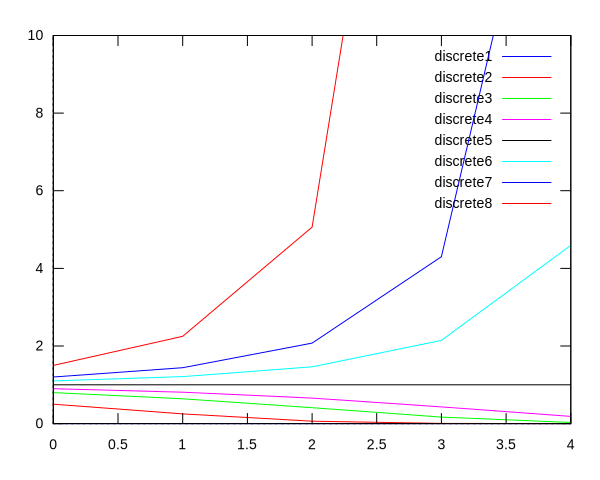

In [10]:
set_plot_option([svg_file, "maxplot.svg"])$
plot2d([[discrete,xy0],
        [discrete,xy1],
        [discrete,xy2],
        [discrete,xy3],
        [discrete,xy4],
        [discrete,xy5],
        [discrete,xy6],
        [discrete,xy7]], [x, 0, 4], [y, 0, 10])$

### A Port to Common Lisp (in Maxima)

We're going to rewrite that Maxima function in Lisp, but first let's explore the bits of Lisp we're going to need to use, as well as how working with Lisp inside Maxima is different from using Common Lisp directly.

#### `endcons`?

What's the closest thing to `endcons` in Lisp?

In [11]:
endcons(4, [1, 2, 3]);

(%o18)                           [1, 2, 3, 4]

In [12]:
to_lisp()$


Type (to-maxima) to restart, ($quit) to quit Maxima.


In [13]:
(list* '(1 2 3) 4)

((1 2 3) . 4)

That's not quite what we want ... how about this?

In [14]:
(append '(1 2 3) 4)

(1 2 3 . 4)

Closer. How about this:

In [15]:
(append '(1 2 3) '(4))

(1 2 3 4)

We can display this in Maxima's format with the following:

In [16]:
(displa `((MLIST SIMP) ,@(append '(1 2 3) '(4))))

[1, 2, 3, 4]

T

So we have several options here: despite the differences in results, we could make a Lisp function that used them. The one that most closely matches our Maxima function, though, is `append`.

In [17]:
(to-maxima)

Returning to Maxima


#### Extracting Nested Data?

Tbe next thing we want to be able to do is extract the last element of our list of points, and then from that tuple, extract _its_ last element:

In [18]:
to_lisp()$


Type (to-maxima) to restart, ($quit) to quit Maxima.


In [19]:
(set 'data '((0 0) (1 1) (2 1) (3 2) (4 3) (5 5) (6 8)))

((0 0) (1 1) (2 1) (3 2) (4 3) (5 5) (6 8))

In [20]:
data

((0 0) (1 1) (2 1) (3 2) (4 3) (5 5) (6 8))

In [21]:
(last data)

((6 8))

In [22]:
(last (last data))

((6 8))

If you're coming from Clojure, that might look like something's broken ;-) But, in fact, it's doing exaclty what it's designed to do. From the Common Lisp Hyper Spec: 

"`last` returns the last n conses (not the last n elements) of list)."

So it's not really going to help us get to that last element. We do, however, have of the oldest computer function definitions at out disposal: the (in)famous `car/cdr` combinations:

In [23]:
(car (last data))

(6 8)

In [24]:
(cdr (car (last data)))

(8)

Or the more concise alias for `(cdr (car ...))`:

In [25]:
(cdar (last data))

(8)

In [26]:
(to-maxima)

Returning to Maxima


#### Recursive Functions

Our Maxima function uses two functions where it might be nice to just use one. Lisp allows for the definition of functions inside of functions using `flet` (where `let` is a way of defining variables for use in a specific block of code, `flet` lets you do that for functions). However, `flet` doesn't support recursive definitions.

There is another way we could do this, though: using `label`.

Let's take a classic function as an example:

In [27]:
to_lisp()$


Type (to-maxima) to restart, ($quit) to quit Maxima.


In [28]:
(defun fib2 (n a b)
  (if (= n 0)
    a
    (fib2 (- n 1) b (+ a b))))

(defun fib1 (number)
  (fib2 number 0 1))

FIB2

FIB1

In [29]:
(fib1 0)
(fib1 1)
(fib1 6)
(fib1 12)

0

1

8

144

Now let's see how to combine these two functions into one using `label`:

In [30]:
(defun fib (number)
  "Fibonacci sequence function."
  (labels ((f0 (n a b)
             (if (= n 0)
               a
               (f0 (- n 1) b (+ a b)))))
    (f0 number 0 1)))

FIB

In [31]:
(fib 0)
(fib 1)
(fib 6)
(fib 12)

0

1

8

144

In [32]:
(to-maxima)

Returning to Maxima


#### Maxima Interop

The next part is the tricky bit: how to we send results from Lisp functions back to Maxima such that those results may be used in Maxima functions?

For starters, we know that a Lisp function that we want to call from Maxima will need to be prefixed with a `$`. We'll also need to use underscores instead of the more Lispy hypens in names, since Maxima can't handle hypens in function names (it always interprets the hyphen as minus sign).

In [33]:
to_lisp()$

(defun $get_data ()
  0)
  
(to-maxima)

$GET_DATA


Type (to-maxima) to restart, ($quit) to quit Maxima.
Returning to Maxima


In [34]:
get_data();

(%o23)                                 0

Good news -- no problem returning integers!

What about a list?

In [35]:
to_lisp()$

(defun $get_data ()
  '(0 1))
  
(to-maxima)

get_data();


Type (to-maxima) to restart, ($quit) to quit Maxima.

REDEFINITION-WITH-DEFUN: 
  redefining MAXIMA::$GET_DATA in DEFUN
Returning to Maxima


$GET_DATA

The value
  0
is not of type
  SYMBOL
when binding SYMBOL

Okay, here we're seeing a problem. We can take a hint from above when we wanted to display Lisp values formatted as Maxima values: `(MLIST SIMP)` was used to create a Maxima literal list. There are Maxima functions which may be called from Lisp, and `mlist` is one of these. Using these, we can create S-expressions that will be properly parsed by Maxima. For example:

In [36]:
to_lisp()$

(defun $get_data ()
  (cons '(mlist) '(0 1)))
  
(to-maxima)

get_data();


Type (to-maxima) to restart, ($quit) to quit Maxima.

REDEFINITION-WITH-DEFUN: 
  redefining MAXIMA::$GET_DATA in DEFUN
Returning to Maxima


$GET_DATA

(%o27)                              [0, 1]

Let's try again with nested data:

In [37]:
to_lisp()$

(defun $get_data ()
  (cons '(mlist) '((0 0) (1 1) (2 1) (3 2) (4 3) (5 5) (6 8))))
  
(to-maxima)

get_data();


Type (to-maxima) to restart, ($quit) to quit Maxima.

REDEFINITION-WITH-DEFUN: 
  redefining MAXIMA::$GET_DATA in DEFUN
Returning to Maxima


$GET_DATA

The value
  0
is not of type
  SYMBOL
when binding SYMBOL

That doesn't work, since we've now got more lists which need to be converted. To gain some insight, let's look at it from the other end: if we send the data we want to get back, what does that look like inside Lisp? We'll create a little utility function to display the data, and then give it a whirl:

In [38]:
to_lisp()$

(defun $show_data (data)
  (format t "~s" data)
  t)
  
(to-maxima)

show_data([[0, 0], [1, 1], [2, 1], [3, 2], [4, 3], [5, 5], [6, 8]]);


Type (to-maxima) to restart, ($quit) to quit Maxima.
Returning to Maxima


$SHOW_DATA

(%o31)                               true

((MLIST SIMP) ((MLIST SIMP) 0 0) ((MLIST SIMP) 1 1) ((MLIST SIMP) 2 1)
 ((MLIST SIMP) 3 2) ((MLIST SIMP) 4 3) ((MLIST SIMP) 5 5) ((MLIST SIMP) 6 8))

If we try this backwards, does it work?

In [39]:
to_lisp()$

(defun $get_data ()
  '((MLIST SIMP) ((MLIST SIMP) 0 0) 
                 ((MLIST SIMP) 1 1) 
                 ((MLIST SIMP) 2 1)
                 ((MLIST SIMP) 3 2) 
                 ((MLIST SIMP) 4 3) 
                 ((MLIST SIMP) 5 5) 
                 ((MLIST SIMP) 6 8)))

(to-maxima)

get_data();


Type (to-maxima) to restart, ($quit) to quit Maxima.

REDEFINITION-WITH-DEFUN: 
  redefining MAXIMA::$GET_DATA in DEFUN
Returning to Maxima


$GET_DATA

(%o33)     [[0, 0], [1, 1], [2, 1], [3, 2], [4, 3], [5, 5], [6, 8]]

Excellent! We're making progress. 

Now, can we make this a _little_ more general?

In [40]:
to_lisp()$

(defun $get_data ()
  (let ((data '((0 0) (1 1) (2 1) (3 2) (4 3) (5 5) (6 8))))
    (cons '(mlist) (map 'list (lambda (x) `((mlist) ,@x)) data))))

(to-maxima)

get_data();


Type (to-maxima) to restart, ($quit) to quit Maxima.

REDEFINITION-WITH-DEFUN: 
  redefining MAXIMA::$GET_DATA in DEFUN
Returning to Maxima


$GET_DATA

(%o35)     [[0, 0], [1, 1], [2, 1], [3, 2], [4, 3], [5, 5], [6, 8]]

Good progress, and we discovered that the `SIMP` isn't really needed to get the result we're looking for.

Now let's make it a function that takes Lisp tuples and returns the nested Maxima data we want:

In [41]:
to_lisp()$

(defun points->maxima (data)
  (cons '(mlist) 
        (map 'list (lambda (x) `((mlist) ,@x)) data)))

(defun $get_data ()
  (points->maxima `((0 0) (1 1) (2 1) (3 2) (4 3) (5 5) (6 8))))

(to-maxima)

get_data();


Type (to-maxima) to restart, ($quit) to quit Maxima.

REDEFINITION-WITH-DEFUN: 
  redefining MAXIMA::$GET_DATA in DEFUN
Returning to Maxima


POINTS->MAXIMA

$GET_DATA

(%o37)     [[0, 0], [1, 1], [2, 1], [3, 2], [4, 3], [5, 5], [6, 8]]

Success! With all of that done, we're ready to rewrite the original function in Lisp ...

#### The Rewrite

Here's the original funtion:

```maxima
f_rec(func, acc, x, n) := 
    block ([t: length(acc)],
        (if t = n
         then acc
         else f_rec(func, endcons([t, func(x)], acc), func(x), n)))$
         
recurse(func, x, n) :=
    f_rec(func, [[0, x]], x, n)$
```

And here it is in Lisp:

In [42]:
to_lisp()$

(defun $recurse (func x0 n)
  (labels ((r0 (func acc n)
    (let* ((step (length acc)))
      (if (eql step n) 
        (points->maxima acc)
        (let* ((args (cdar (last acc)))
               (xn (apply func args)))
          (r0 func (append acc `((,step ,xn))) n))))))
   (r0 func `((0 ,x0)) n)))
  
(to-maxima)

$RECURSE


Type (to-maxima) to restart, ($quit) to quit Maxima.
Returning to Maxima


In [43]:
to_lisp()$

(defun $squared (x)
  (* x x))
  
(to-maxima)

xy0: recurse(squared, 0, 5);
xy1: recurse(squared, 0.5, 5);
xy2: recurse(squared, 0.8, 5);
xy3: recurse(squared, 0.9, 5);
xy4: recurse(squared, 1, 5);
xy5: recurse(squared, 1.1, 5);
xy6: recurse(squared, 1.2, 5);
xy7: recurse(squared, 1.5, 5);


Type (to-maxima) to restart, ($quit) to quit Maxima.
Returning to Maxima


$SQUARED

(%o40)             [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]]

(%o41) [[0, 0.5], [1, 0.25], [2, 0.0625], [3, 0.00390625], 
                                                         [4, 1.52587890625e-5]]

(%o42) [[0, 0.8], [1, 0.6400000000000001], [2, 0.4096000000000002], 
                             [3, 0.1677721600000001], [4, 0.02814749767106565]]

(%o43) [[0, 0.9], [1, 0.81], [2, 0.6561000000000001], [3, 0.4304672100000002], 
                                                       [4, 0.1853020188851842]]

(%o44)             [[0, 1], [1, 1], [2, 1], [3, 1], [4, 1]]

(%o45) [[0, 1.1], [1, 1.21], [2, 1.4641], [3, 2.143588810000001], 
                                                        [4, 4.594972986357221]]

(%o46) [[0, 1.2], [1, 1.44], [2, 2.0736], [3, 4.299816959999999], 
                                                        [4, 18.48842588950363]]

(%o47) [[0, 1.5], [1, 2.25], [2, 5.0625], [3, 25.62890625], 
                                                        [4, 656.8408355712891]]

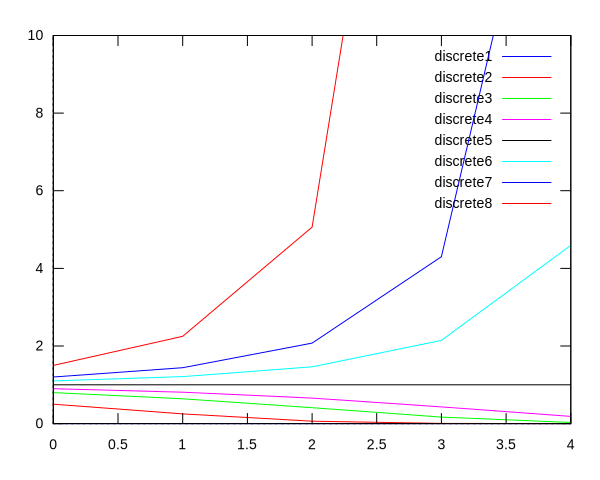

In [44]:
plot2d([[discrete,xy0],
        [discrete,xy1],
        [discrete,xy2],
        [discrete,xy3],
        [discrete,xy4],
        [discrete,xy5],
        [discrete,xy6],
        [discrete,xy7]], [x, 0, 4], [y, 0, 10])$